In [7]:
import numpy as np
import pandas as pd
import nltk

In [8]:
data = pd.read_csv('./data/Merged-Formatted-Indian-Names.csv')

In [9]:
data.head()

,name,gender
0,barjraj,male
1,ramdin verma,male
2,sharat chandran,male
3,birender mandal,male
4,amit,male


In [10]:
from nltk.tokenize import SyllableTokenizer

In [11]:
def getNameFeatures(name):
    return {
        'name': name,
        'length': len(name), 
        'no_of_syllables': len(SyllableTokenizer().tokenize(name))
    }

In [13]:
features = [(getNameFeatures(row['name']), row['gender']) for i, row in data.iterrows()]

C:\Users\Soumya\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '2'
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '4'
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '1'
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '8'
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequenci

In [14]:
features[:5]

[({'name': 'barjraj', 'length': 7, 'no_of_syllables': 2}, 'male'),
 ({'name': 'ramdin verma', 'length': 12, 'no_of_syllables': 5}, 'male'),
 ({'name': 'sharat chandran', 'length': 15, 'no_of_syllables': 5}, 'male'),
 ({'name': 'birender mandal', 'length': 15, 'no_of_syllables': 6}, 'male'),
 ({'name': 'amit', 'length': 4, 'no_of_syllables': 2}, 'male')]

In [15]:
import random
random.shuffle(features)

In [16]:
len(features)

32158

In [17]:
train_set, test_set = features[9700:], features[:9700]

In [18]:
print('Train set', len(train_set))
print('Test set', len(test_set))

Train set 22458
Test set 9700


In [19]:
clf = nltk.NaiveBayesClassifier.train(train_set)

In [20]:
pd.DataFrame({"Gender": ['Female', 'Male'], "Sample Count": [data[data['gender'] == 'female'].shape[0], data[data['gender'] == 'male'].shape[0]]}).to_csv('./data/data_distribution.csv', index=False)

In [21]:
f_count_train = 0;
m_count_train = 0;
f_count_test = 0;
m_count_test = 0;

for fetaure, gender in train_set:
    if(gender == 'female'):
        f_count_train += 1
    else:
        m_count_train += 1

for fetaure, gender in test_set:
    if(gender == 'female'):
        f_count_test += 1
    else:
        m_count_test += 1

pd.DataFrame({
    'gender': ['Female', 'Male'],
    'training': [f_count_train, m_count_train],
    'test': [f_count_test, m_count_test]
}).to_csv('./data/gender_distribution.csv', index=False)

## Training accuracy

In [22]:
nltk.classify.accuracy(clf, train_set)*100

95.24890907471725

## Test accuracy

In [23]:
nltk.classify.accuracy(clf, test_set)*100

78.35051546391753

## Prediction on new data

In [24]:
def predictGender(name):
    return clf.classify(getNameFeatures(name)), clf.prob_classify(getNameFeatures(name))

In [25]:
print(predictGender("annamalai niranjan sankar"))

('male', <ProbDist with 2 samples>)


In [24]:
clf.show_most_informative_features()

Most Informative Features
         no_of_syllables = 20             female : male   =      5.5 : 1.0
                  length = 41             female : male   =      3.6 : 1.0
         no_of_syllables = 18             female : male   =      3.1 : 1.0
                  length = 11               male : female =      3.1 : 1.0
                  length = 39             female : male   =      3.0 : 1.0
                  length = 45             female : male   =      2.9 : 1.0
                  length = 15             female : male   =      2.7 : 1.0
                  length = 18               male : female =      2.7 : 1.0
         no_of_syllables = 17             female : male   =      2.5 : 1.0
                  length = 43             female : male   =      2.5 : 1.0


In [26]:
test_set_without_lables = [feature for feature, gender in test_set]

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
predictions = clf.classify_many(test_set_without_lables)

In [29]:
test_labels = [gender for feature, gender in test_set]

In [30]:
report = classification_report(test_labels, predictions, output_dict=True)

In [31]:
report_df = pd.DataFrame(report)

In [32]:
report_df.T.to_csv('./data/classification_report_nb.csv')

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

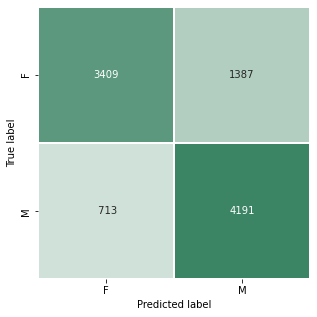

In [34]:
plt.figure(figsize = (6, 5))
c_matrix = confusion_matrix(test_labels, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, xticklabels=['F', 'M'], fmt='4', yticklabels=['F', 'M'], cmap=c_map, annot= True, square = True, linewidths= 0.5, cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./plots/cf-matrix.jpg', dpi=1200)

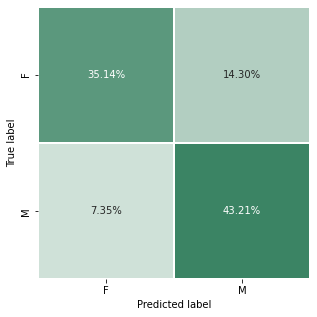

In [35]:
plt.figure(figsize = (6, 5))
c_matrix = confusion_matrix(test_labels, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix/np.sum(c_matrix), center = 0, xticklabels=['F', 'M'], fmt='.2%', yticklabels=['F', 'M'], cmap=c_map, annot= True, square = True, linewidths= 0.5, cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./plots/cf-matrix-per.jpg', dpi=1200)

In [36]:
from joblib import dump, load
dump(clf, './model/nb-classifier.joblib')

['./model/nb-classifier.joblib']